In [13]:
import numpy as np
import json
import pandas as pd

PredData2028  = np.load("processed_data/PredData2028.npy")
TotalData  = np.load("processed_data/TotalData.npy")

baseData  = json.load(open("processed_data/baseData.json","r"))

N0 = json.load(open("processed_data/N0.json","r"))

baseData = pd.DataFrame(baseData)

country = baseData["NOC"].unique()




In [14]:
countryHasMadel = {country[i]:0 for i in range(len(country))}
for row in baseData.itertuples():
    if row.Medal != "No medal":
        countryHasMadel[row.NOC] = 1

countryNoMadel = [country[i] for i in range(len(country)) if countryHasMadel[country[i]] == 0]
print(countryNoMadel)

['CHA', 'NCA', 'LBA', 'PLE', 'COM', 'BRU', 'MDV', 'YAR', 'CGO', 'BEN', 'SOM', 'MLI', 'ANG', 'BAN', 'ESA', 'HON', 'SEY', 'MTN', 'SKN', 'VIN', 'LBR', 'NEP', 'PLW', 'ASA', 'SAM', 'RWA', 'MLT', 'GUI', 'BIZ', 'YMD', 'SLE', 'PNG', 'YEM', 'OMA', 'VAN', 'IVB', 'CAF', 'MAD', 'MAL', 'BIH', 'GUM', 'CAY', 'GBS', 'TLS', 'COD', 'LAO', 'ROT', 'CAM', 'SOL', 'CRT', 'GEQ', 'BOL', 'SAA', 'ANT', 'AND', 'FSM', 'MYA', 'MAW', 'RHO', 'STP', 'LIE', 'GAM', 'COK', 'SWZ', 'NBO', 'ARU', 'NRU', 'VNM', 'BHU', 'MHL', 'KIR', 'UNK', 'TUV', 'NFL', 'SSD', 'LES', 'LBN']


In [15]:
Year  = baseData["Year"].unique()
Year  = sorted(Year)
print(Year)


# for row in baseData.itertuples():


[np.int64(1896), np.int64(1900), np.int64(1904), np.int64(1906), np.int64(1908), np.int64(1912), np.int64(1920), np.int64(1924), np.int64(1928), np.int64(1932), np.int64(1936), np.int64(1948), np.int64(1952), np.int64(1956), np.int64(1960), np.int64(1964), np.int64(1968), np.int64(1972), np.int64(1976), np.int64(1980), np.int64(1984), np.int64(1988), np.int64(1992), np.int64(1996), np.int64(2000), np.int64(2004), np.int64(2008), np.int64(2012), np.int64(2016), np.int64(2020), np.int64(2024)]


In [16]:
YearAtotalcount = {}
for row in baseData.itertuples():
    if row.Year not in YearAtotalcount:
        YearAtotalcount[row.Year] = []

    YearAtotalcount[row.Year].append(row.Name)
for key in YearAtotalcount.keys():
    YearAtotalcount[key] = len(YearAtotalcount[key])

print(YearAtotalcount)

athlete = {}
YearAinitialcount = {}
for row in baseData.itertuples():
    if row.Name not in athlete:
        if row.Year not in YearAinitialcount:
            YearAinitialcount[row.Year] = 1
        else:
            YearAinitialcount[row.Year] += 1
        athlete[row.Name] = row.Year
    else:
        athlete[row.Name] = max(row.Year,athlete[row.Name])

YearAfinalcount = {}
for key,value in athlete.items():
    if value not in YearAfinalcount:
        YearAfinalcount[value] = 1
    else:
        YearAfinalcount[value] += 1

print(YearAinitialcount)
print(YearAfinalcount)

json.dump({"Total":YearAtotalcount,"Initial":YearAinitialcount,"Final":YearAfinalcount},open("processed_data/YearA3.json","w"))

{1992: 12977, 2012: 12920, 1920: 4292, 1900: 1936, 1932: 2969, 1952: 8270, 2000: 13821, 1996: 13780, 1912: 4040, 1924: 5233, 1948: 6405, 2008: 13602, 2016: 13688, 2004: 13443, 1984: 9454, 1968: 8588, 1972: 10304, 1988: 12037, 1936: 6506, 1956: 5127, 1960: 8119, 1928: 4992, 1976: 8641, 1980: 7191, 1964: 7702, 1906: 1733, 1904: 1301, 1908: 3101, 1896: 380, 2020: 15121, 2024: 14892}
{1992: 6594, 2012: 6468, 1920: 2274, 1900: 1183, 1932: 1466, 1952: 3755, 2000: 6879, 1996: 7019, 1912: 1952, 1948: 3901, 2008: 6781, 2016: 7075, 1984: 5534, 1968: 4010, 1988: 6303, 1936: 3784, 2004: 6585, 1976: 4226, 1956: 2395, 1924: 2585, 1960: 4098, 1972: 5221, 1964: 3660, 1980: 3924, 1906: 752, 1928: 2561, 1908: 1731, 1904: 604, 1896: 170, 2020: 9557, 2024: 6945}
{1992: 6044, 2012: 6664, 1920: 1998, 1900: 1102, 1932: 1399, 1952: 3757, 2000: 6706, 1924: 2500, 1948: 3164, 2008: 6876, 2016: 9164, 2004: 6486, 1984: 4725, 1972: 5135, 1988: 5605, 1936: 4031, 1912: 1957, 1996: 6511, 1960: 3787, 1928: 2604, 1976: 

In [94]:
# 仿照上面，统计不同国家的YearAtotalcount，YearAinitialcount，YearAfinalcount
countryAtotalcount = {}
def getCountryYearAcount(NOCNAME):
    CountryYearAtotalcount = {}
    for row in baseData.itertuples():
        if row.NOC != NOCNAME:
            continue
        if row.Year not in CountryYearAtotalcount:
            CountryYearAtotalcount[row.Year] = []
        CountryYearAtotalcount[row.Year].append(row.Name)
    
    for key in CountryYearAtotalcount.keys():
        # print(CountryYearAtotalcount[key])
        CountryYearAtotalcount[key] = len(CountryYearAtotalcount[key])

    athlete = {}
    CountryYearAinitialcount = {}
    for row in baseData.itertuples():
        if row.NOC != NOCNAME:
            continue
        if row.Name not in athlete:
            if row.Year not in CountryYearAinitialcount:
                CountryYearAinitialcount[row.Year] = 1
            else:
                CountryYearAinitialcount[row.Year] += 1

            athlete[row.Name] = row.Year
        else:
            athlete[row.Name] = max(row.Year,athlete[row.Name])
    if NOCNAME == "USA":
        print(athlete)
    CountryYearAfinalcount = {}
    for key,value in athlete.items():
        if value not in CountryYearAfinalcount:
            CountryYearAfinalcount[value] = 1
        else:
            CountryYearAfinalcount[value] += 1
    return (CountryYearAtotalcount,CountryYearAinitialcount,CountryYearAfinalcount)

for coun in country:
    countryAtotalcount[coun] = getCountryYearAcount(coun)
#     if coun == "USA":
#         break
    # break
# print(getCountryYearAcount("USA"))

{'Stephen Abas': 2004, 'David Abbott': 1928, 'Mara Abbott': 2016, 'Margaret (-dunne)': 1900, 'Mary (perkins-)': 1900, 'Monica Abbott': 2020, 'Nia Abdallah': 2004, 'Abdihakim Abdirahman': 2012, 'Aquil (shumate-)': 2004, 'Julius Abdur-rahim': 2000, 'Brooke Abel': 2008, 'Louis Abell': 1904, 'Michael Abernathy': 2000, 'Edgar Ablowich': 1932, 'Cheryl Abplanalp': 1996, 'Donald Jr.': 2012, 'Richard Abrahamson': 1976, 'Fletcher Jr.': 1972, 'Brian Abshire': 1988, 'Ervin Acel': 1928, 'Charles Ackerly': 1920, 'Amelia (-harvey)': 2012, 'Gordon Adam': 1936, 'Tatyana Adamovich': 1972, 'Bartlett Adams': 1904, 'Benjamin Adams': 1912, 'Natalie (-brannan)': 2016, 'Edgar Adams': 1904, 'Harry Adams': 1920, 'Judith Adams': 1996, 'Morgan Jr.': 1936, 'Platt Adams': 1912, 'Rachael Adams': 2016, 'Wayman Adams': 1932, 'William Adams': 1992, 'James Adamson': 1996, 'William Ade': 1932, 'Amanda (-schneider)': 2000, 'Bradley Adkins': 2016, 'Charles Adkins': 1952, 'Derrick Adkins': 1996, 'Nathan Adrian': 2016, 'Fred

In [104]:

# 根据CountryYearAtotalcount选择前20的国家并绘制出来

# print(countryAtotalcount.items())
top20key = sorted(countryAtotalcount.items(), key=lambda x: sum(x[1][0].values()), reverse=True)[:20]
print(top20key)
for key,value in top20key:
    print(key,value[0])
    print(key,sum(value[0].values()))
    # break
    # print(top20key)
json.dump(top20key,open("processed_data/top20country.json","w"))

[('USA', ({2004: 726, 1928: 426, 2016: 719, 1900: 135, 2008: 763, 2000: 764, 2012: 689, 1904: 1109, 1932: 743, 1996: 839, 1984: 693, 1972: 578, 1976: 554, 1988: 715, 1920: 473, 1936: 487, 1912: 364, 1908: 219, 1992: 734, 1952: 451, 1948: 424, 1960: 428, 1968: 529, 1956: 443, 1964: 492, 1924: 459, 1906: 81, 1896: 27, 2020: 856, 2024: 854}, {2004: 342, 1928: 225, 2016: 365, 1900: 70, 2008: 392, 2000: 402, 1932: 387, 1996: 451, 1984: 478, 1972: 296, 1988: 368, 1920: 263, 1936: 267, 1904: 499, 1912: 146, 2012: 298, 1908: 91, 1992: 351, 1952: 214, 1948: 261, 1976: 287, 1968: 261, 1956: 216, 1964: 266, 1960: 200, 1924: 234, 1896: 13, 1906: 19, 2020: 486, 2024: 387}, {2004: 336, 1928: 207, 2016: 407, 1900: 62, 2020: 414, 2012: 337, 2000: 397, 2008: 376, 1904: 476, 1932: 366, 1996: 464, 1976: 339, 1972: 299, 1988: 330, 1920: 222, 1936: 321, 1912: 144, 1992: 359, 1952: 197, 1984: 357, 1948: 217, 1960: 210, 1968: 253, 1964: 249, 1924: 238, 2024: 619, 1956: 212, 1908: 92, 1906: 25, 1896: 10})), (

[(1896, 27), (1900, 135), (1904, 1109), (1906, 81), (1908, 219), (1912, 364), (1920, 473), (1924, 459), (1928, 426), (1932, 743), (1936, 487), (1948, 424), (1952, 451), (1956, 443), (1960, 428), (1964, 492), (1968, 529), (1972, 578), (1976, 554), (1984, 693), (1988, 715), (1992, 734), (1996, 839), (2000, 764), (2004, 726), (2008, 763), (2012, 689), (2016, 719), (2020, 856), (2024, 854)]


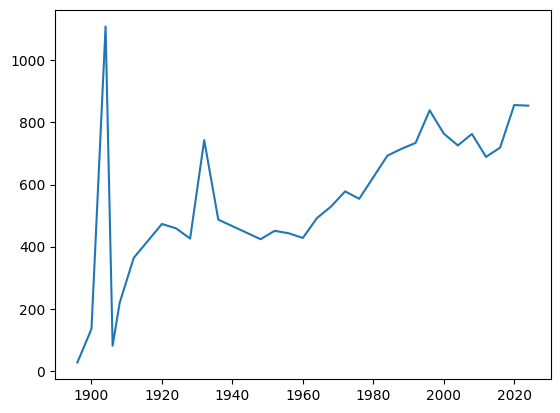

In [103]:
import matplotlib.pyplot as plt
a,b = top20key[0]
temp = sorted(b[0].items(), key=lambda x: x[0], reverse=False)
print(temp)
plt.plot([t[0] for t in temp],[t[1] for t in temp])
plt.show()

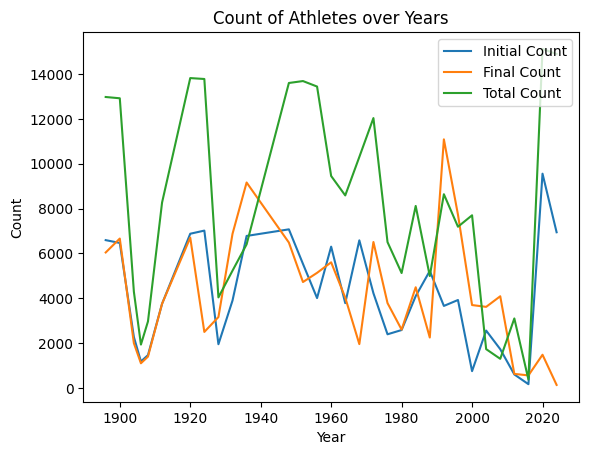

In [96]:
# 绘制initialcount和finalcount,totalcount随年份变化的折线图
import matplotlib.pyplot as plt


plt.plot(Year, list(YearAinitialcount.values()), label='Initial Count')
plt.plot(Year, list(YearAfinalcount.values()), label='Final Count')
plt.plot(Year, list(YearAtotalcount.values()), label='Total Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Athletes over Years')
plt.legend()



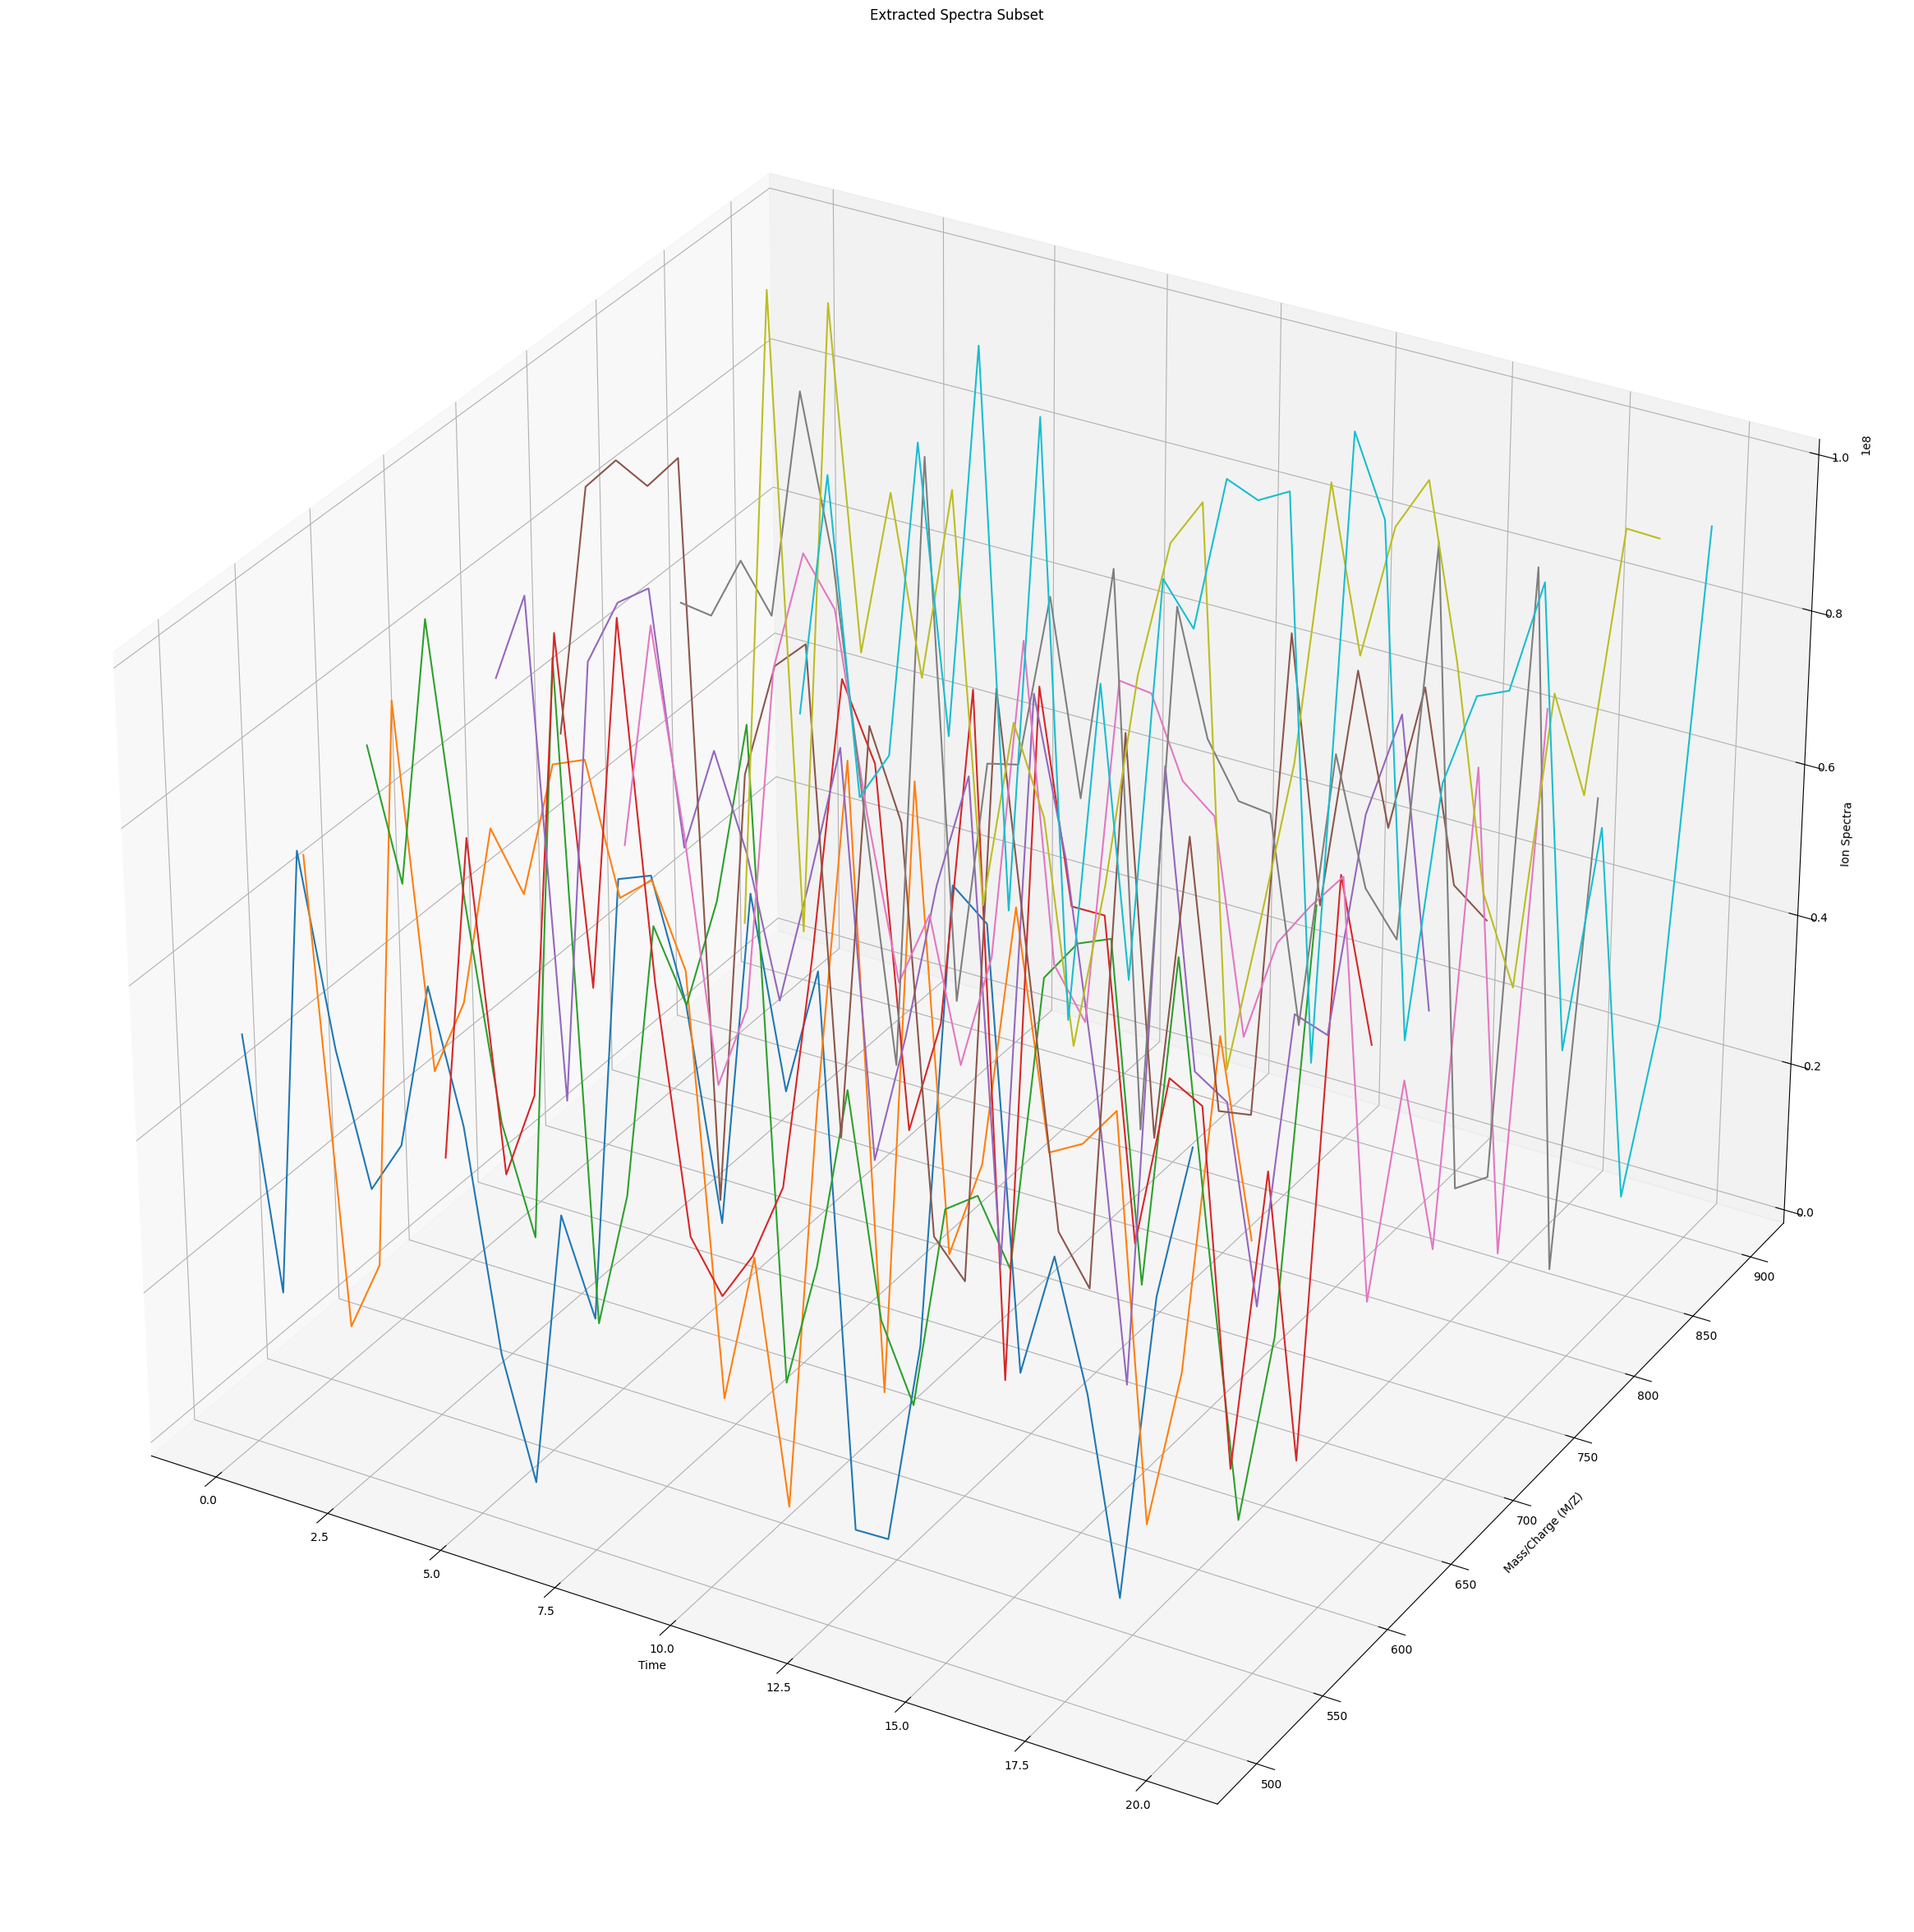

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate example data
# Time data (e.g., time steps)
time = np.linspace(0, 20, 30)

# Mass/Charge (M/Z) data (e.g., mass/charge values)
mz = np.linspace(500, 900, 10)

# Ion Spectra values (e.g., intensity or count)
ion_spectra = np.random.rand(10, 30) * 1e8  # Random ion spectra values

# Create the figure and 3D axis
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')

# Plot each mass/charge data against time
for i in range(ion_spectra.shape[0]):
    ax.plot(time, np.full_like(time, mz[i]), ion_spectra[i], label=f'M/Z = {mz[i]:.1f}')

# Set labels
ax.set_xlabel('Time')
ax.set_ylabel('Mass/Charge (M/Z)')
ax.set_zlabel('Ion Spectra')

# Title
ax.set_title('Extracted Spectra Subset')

# Display the plot
plt.show()
